Name: Vinush.CV

Reg no: 212222230176

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Model

In [5]:
data=pd.read_csv("ner_dataset.csv",encoding="latin1")

In [6]:
data.head(50)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [7]:
data = data.fillna(method="ffill")


In [8]:
data.head(50)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [9]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 13134
Unique tags in corpus: 17


In [10]:
words=list(data['Word'].unique())
words.append("End")
tags=list(data['Tag'].unique())

In [11]:
print("unique tags are:",tags)

unique tags are: ['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


In [12]:
num_words=len(words)

In [13]:
num_tags=len(tags)

In [14]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [15]:
getter=SentenceGetter(data)

In [16]:
sentences= getter.sentences

In [17]:
len(sentences)

6612

In [18]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [19]:
word2idx={w:i+1 for i,w in enumerate(words)}
tag2idx={t:i for i,t in enumerate(tags)}

(array([  3.,   4.,  64.,  54.,  72., 233., 162., 165., 445., 274., 251.,
        583., 312., 683., 309., 303., 612., 254., 271., 465., 184., 175.,
        238.,  92.,  76., 111.,  48.,  74.,  20.,  13.,  25.,   4.,   7.,
          9.,   4.,   1.,   4.,   1.,   0.,   1.,   0.,   0.,   3.,   1.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 2.  ,  3.36,  4.72,  6.08,  7.44,  8.8 , 10.16, 11.52, 12.88,
        14.24, 15.6 , 16.96, 18.32, 19.68, 21.04, 22.4 , 23.76, 25.12,
        26.48, 27.84, 29.2 , 30.56, 31.92, 33.28, 34.64, 36.  , 37.36,
        38.72, 40.08, 41.44, 42.8 , 44.16, 45.52, 46.88, 48.24, 49.6 ,
        50.96, 52.32, 53.68, 55.04, 56.4 , 57.76, 59.12, 60.48, 61.84,
        63.2 , 64.56, 65.92, 67.28, 68.64, 70.  ]),
 <BarContainer object of 50 artists>)

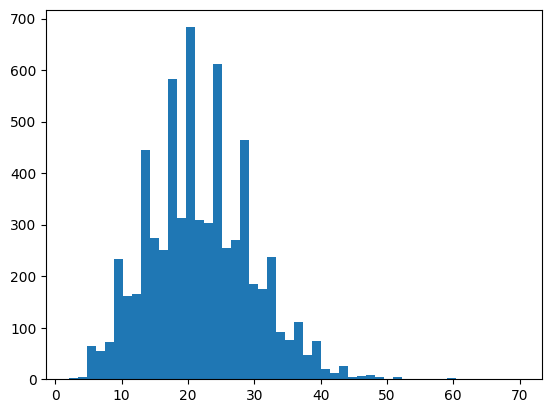

In [20]:
plt.hist([len(s) for s in sentences],bins=50)

In [21]:
X1 = [[word2idx[w[0]] for w in s] for s in sentences]


In [22]:
type(X1[0])

list

In [23]:
X1[0]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 10,
 16,
 2,
 17,
 18,
 19,
 20,
 21,
 22]

In [24]:
max_len=50

In [25]:
X=sequence.pad_sequences(maxlen=max_len,sequences=X1,padding="post",value=num_words-1)

In [26]:
X[0]

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    10,    16,     2,
          17,    18,    19,    20,    21,    22, 13134, 13134, 13134,
       13134, 13134, 13134, 13134, 13134, 13134, 13134, 13134, 13134,
       13134, 13134, 13134, 13134, 13134, 13134, 13134, 13134, 13134,
       13134, 13134, 13134, 13134, 13134], dtype=int32)

In [27]:
y1=[[tag2idx[w[2]] for w in s] for s in sentences]

In [28]:
y=sequence.pad_sequences(maxlen=max_len,sequences=y1,padding="post",value=tag2idx["O"])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=1)

In [30]:
input_word = layers.Input(shape=(max_len,))
embedding_layer= layers.Embedding(input_dim=num_words,output_dim=50,input_length=max_len)(input_word)
dropout_layer=layers.SpatialDropout1D(0.1)(embedding_layer)
bidirectional_lstm=layers.Bidirectional(layers.LSTM(units=100,return_sequences=True,recurrent_dropout=0.1))(dropout_layer)
output=layers.TimeDistributed(layers.Dense(num_tags,activation="softmax"))(bidirectional_lstm)
model = Model(input_word, output)

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            656750    
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 50)            0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 50, 200)           120800    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 50, 17)            3417      
 ributed)                                                        
                                                             

In [32]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [33]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    batch_size=32,
    epochs=3,
)

Epoch 1/3
166/166 [==============================] - 41s 213ms/step - loss: 0.4960 - accuracy: 0.9280 - val_loss: 0.2898 - val_accuracy: 0.9346
Epoch 2/3
166/166 [==============================] - 33s 201ms/step - loss: 0.2275 - accuracy: 0.9379 - val_loss: 0.1788 - val_accuracy: 0.9486
Epoch 3/3
166/166 [==============================] - 34s 208ms/step - loss: 0.1544 - accuracy: 0.9512 - val_loss: 0.1467 - val_accuracy: 0.9571


In [35]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.495958,0.927979,0.289827,0.934588
1,0.227454,0.937924,0.178847,0.948587
2,0.154390,0.951223,0.146692,0.957143


Name : Vinush.cv  Reg no: 212222230176


<Axes: >

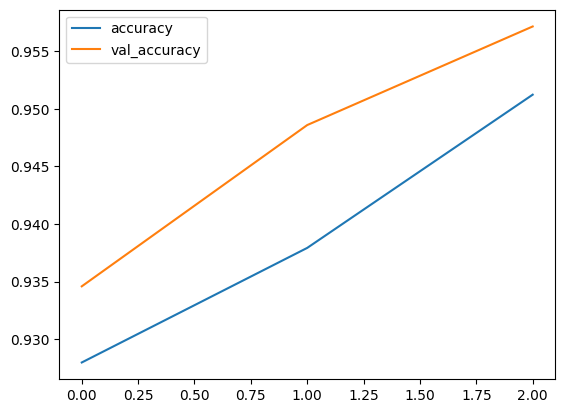

In [44]:
print("Name : Vinush.cv  Reg no: 212222230176")
metrics[['accuracy','val_accuracy']].plot()


Name : Vinush.cv  Reg no: 212222230176


<Axes: >

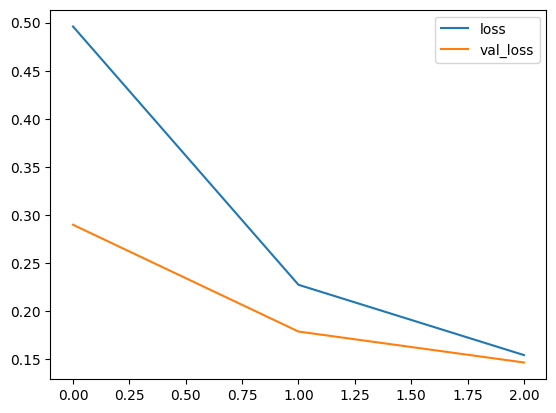

In [45]:
print("Name : Vinush.cv  Reg no: 212222230176")
metrics[['loss','val_loss']].plot()

In [46]:
print("Name : Vinush.cv  Reg no: 212222230176")

i = 20
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(X_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Name : Vinush.cv  Reg no: 212222230176
1/1 [==============================] - 0s 136ms/step
Word           True 	 Pred

------------------------------
It             O	O
is             O	O
expected       O	O
to             O	O
cost           O	O
$              O	O
1              O	O
trillion       O	O
over           O	O
10             O	O
years          O	O
.              O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose       O	O
comatose     